In [1]:
import torch
from data import ClimateDataset
from models import ClassificationModel
from engine import Engine

In [2]:
model_checkpoint='bert-base-uncased'

In [3]:
results = {'acc':[],
           'f1':[],
           'g':[]}

In [4]:
gammas = [2,4,8,16]
lr = 1.0e-5


for g in gammas:
    print(f'Grid search {model_checkpoint}, learning rate {lr}, focal loss, gamma: {g}')
    data = ClimateDataset(model_to_train=3,model_checkpoint=model_checkpoint,batch_size=32)
    data.setup_dataloaders()
    model = ClassificationModel(model_checkpoint=data.model_checkpoint,num_labels=data.num_labels)
    trainer = Engine(epochs=30,labels=data.labels)
    trainer.model = model.model
    trainer.dataset_encoded = data.dataset_encoded
    acc, f1 = trainer.run(lr=lr,
                          wd=0.0,
                          train_dataloader=data.train_dataloader,
                          eval_dataloader=data.eval_dataloader,
                          test_dataloader=data.test_dataloader,
                          focalloss=True,
                          gamma=g,
                          early_stop=3)
    results['acc'].append(acc)
    results['f1'].append(f1)
    results['g'].append(g)
    print('### '*10)
    print(results)
    print('### '*10)
    with torch.no_grad():
        torch.cuda.empty_cache()
    del data, model, trainer, acc, f1

Grid search bert-base-uncased, learning rate 1e-05, focal loss, gamma: 2


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
You're using a BertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


1 / 30: Train Loss:	15.2568	Val Loss:	2.0200	Accuracy:	0.3580	F1:	0.2909
2 / 30: Train Loss:	12.5731	Val Loss:	1.7818	Accuracy:	0.5148	F1:	0.4627
3 / 30: Train Loss:	9.8268	Val Loss:	1.5852	Accuracy:	0.5355	F1:	0.4831
4 / 30: Train Loss:	7.3583	Val Loss:	1.4193	Accuracy:	0.5917	F1:	0.5445
5 / 30: Train Loss:	5.7489	Val Loss:	1.3289	Accuracy:	0.5947	F1:	0.5547
6 / 30: Train Loss:	4.2289	Val Loss:	1.2576	Accuracy:	0.6154	F1:	0.5818
7 / 30: Train Loss:	3.1473	Val Loss:	1.1802	Accuracy:	0.6509	F1:	0.6266
8 / 30: Train Loss:	2.4013	Val Loss:	1.0920	Accuracy:	0.6834	F1:	0.6575
9 / 30: Train Loss:	1.9117	Val Loss:	1.0193	Accuracy:	0.6893	F1:	0.6570
10 / 30: Train Loss:	1.4427	Val Loss:	1.0816	Accuracy:	0.6450	F1:	0.5940
11 / 30: Train Loss:	1.1326	Val Loss:	0.9690	Accuracy:	0.6893	F1:	0.6549
No improvement for 3 epochs. Stopping early.
best (higgest macro f1-score) val results:
                         precision    recall  f1-score   support

             ad hominem       0.77      0.66      

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
You're using a BertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


1 / 30: Train Loss:	12.0118	Val Loss:	2.0220	Accuracy:	0.3846	F1:	0.3150
2 / 30: Train Loss:	9.3771	Val Loss:	1.8012	Accuracy:	0.5178	F1:	0.4752
3 / 30: Train Loss:	6.9088	Val Loss:	1.6215	Accuracy:	0.5503	F1:	0.4945
4 / 30: Train Loss:	4.9496	Val Loss:	1.4790	Accuracy:	0.5917	F1:	0.5509
5 / 30: Train Loss:	3.6815	Val Loss:	1.3790	Accuracy:	0.6006	F1:	0.5667
6 / 30: Train Loss:	2.6019	Val Loss:	1.3210	Accuracy:	0.6243	F1:	0.6015
7 / 30: Train Loss:	1.9269	Val Loss:	1.2662	Accuracy:	0.6450	F1:	0.6197
8 / 30: Train Loss:	1.4763	Val Loss:	1.1781	Accuracy:	0.6686	F1:	0.6407
9 / 30: Train Loss:	1.1247	Val Loss:	1.1138	Accuracy:	0.6834	F1:	0.6558
10 / 30: Train Loss:	0.8298	Val Loss:	1.1258	Accuracy:	0.6479	F1:	0.5970
11 / 30: Train Loss:	0.5994	Val Loss:	1.0610	Accuracy:	0.6775	F1:	0.6423
12 / 30: Train Loss:	0.3946	Val Loss:	1.0366	Accuracy:	0.6893	F1:	0.6645
13 / 30: Train Loss:	0.2872	Val Loss:	1.0246	Accuracy:	0.6953	F1:	0.6665
14 / 30: Train Loss:	0.2496	Val Loss:	0.9938	Accuracy:	0.70

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
You're using a BertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


1 / 30: Train Loss:	7.5502	Val Loss:	2.0489	Accuracy:	0.3669	F1:	0.3191
2 / 30: Train Loss:	5.4581	Val Loss:	1.8550	Accuracy:	0.4970	F1:	0.4557
3 / 30: Train Loss:	3.7237	Val Loss:	1.6844	Accuracy:	0.5414	F1:	0.4946
4 / 30: Train Loss:	2.4899	Val Loss:	1.5598	Accuracy:	0.5917	F1:	0.5601
5 / 30: Train Loss:	1.7644	Val Loss:	1.4882	Accuracy:	0.5858	F1:	0.5546
6 / 30: Train Loss:	1.2302	Val Loss:	1.4040	Accuracy:	0.6183	F1:	0.5919
7 / 30: Train Loss:	0.8929	Val Loss:	1.3413	Accuracy:	0.6450	F1:	0.6117
8 / 30: Train Loss:	0.6368	Val Loss:	1.2894	Accuracy:	0.6568	F1:	0.6251
9 / 30: Train Loss:	0.4811	Val Loss:	1.2653	Accuracy:	0.6479	F1:	0.5915
10 / 30: Train Loss:	0.3536	Val Loss:	1.2426	Accuracy:	0.6627	F1:	0.6032
11 / 30: Train Loss:	0.2746	Val Loss:	1.2050	Accuracy:	0.6864	F1:	0.6456
12 / 30: Train Loss:	0.2028	Val Loss:	1.1864	Accuracy:	0.6716	F1:	0.6285
13 / 30: Train Loss:	0.1497	Val Loss:	1.1709	Accuracy:	0.6834	F1:	0.6480
14 / 30: Train Loss:	0.1384	Val Loss:	1.1419	Accuracy:	0.686

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
You're using a BertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


1 / 30: Train Loss:	3.0748	Val Loss:	2.0924	Accuracy:	0.3787	F1:	0.3417
2 / 30: Train Loss:	2.0454	Val Loss:	1.9446	Accuracy:	0.4231	F1:	0.3968
3 / 30: Train Loss:	1.2363	Val Loss:	1.7779	Accuracy:	0.5355	F1:	0.4874
4 / 30: Train Loss:	0.7848	Val Loss:	1.6673	Accuracy:	0.5976	F1:	0.5557
5 / 30: Train Loss:	0.4929	Val Loss:	1.5785	Accuracy:	0.6272	F1:	0.5706
6 / 30: Train Loss:	0.3253	Val Loss:	1.5411	Accuracy:	0.6213	F1:	0.5693
7 / 30: Train Loss:	0.2343	Val Loss:	1.4801	Accuracy:	0.6568	F1:	0.6138
8 / 30: Train Loss:	0.1658	Val Loss:	1.4552	Accuracy:	0.6243	F1:	0.5701
9 / 30: Train Loss:	0.1314	Val Loss:	1.4117	Accuracy:	0.6568	F1:	0.6045
10 / 30: Train Loss:	0.0949	Val Loss:	1.3992	Accuracy:	0.6450	F1:	0.6006
No improvement for 3 epochs. Stopping early.
best (higgest macro f1-score) val results:
                         precision    recall  f1-score   support

             ad hominem       0.66      0.67      0.67        67
               anecdote       0.80      0.77      0.79      

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

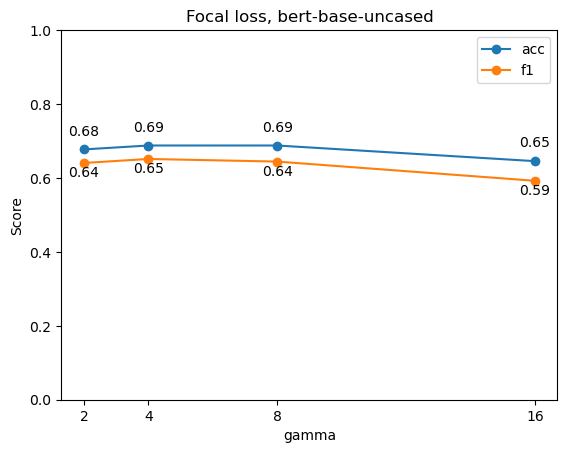

In [6]:
def plot_grid_search(df, title, column):

    # Create the plot
    ax = df.plot(x=column, y=['acc', 'f1'], marker='o', linestyle='-')

    # Set y-axis range between 0 and 1
    plt.ylim(0, 1)

    # Annotate points with F1 scores
    for i, row in df.iterrows(): 
        ax.annotate(f'{row["f1"]:.2f}', (row[column], row["f1"]), textcoords='offset points', xytext=(0, -10), ha='center')

    # Annotate points with Acc scores
    for i, row in df.iterrows():
        ax.annotate(f'{row["acc"]:.2f}', (row[column], row["acc"]), textcoords='offset points', xytext=(0, 10), ha='center')
    
    # 
    plt.xticks(df[column], [val for val in df[column]], ha='center')
    # plt.xscale('log')
    plt.minorticks_off()

    plt.title(title)
    plt.xlabel('gamma')
    plt.ylabel('Score')
    plt.show()

plot_grid_search(pd.DataFrame(results), f'Focal loss, {model_checkpoint}', 'g')